<a href="https://colab.research.google.com/github/Mario-RJunior/olist-e-commerce/blob/master/reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise dos Reviews

## 1) Introdu√ß√£o
Uma importante abordagem ao trabalhar com an√°lise de dados de uma base comercial √© justamente o feedback dos consumidores no que diz respeito √† qualidade dos produtos, ao atendimento, etc. e a neste sentido √© de suma import√¢ncia ter uma base de dados que tenham essas informa√ß√µes, uma vez que elas ajudam a melhorar a qualidade do servi√ßo.

Aqui n√£o √© diferente e neste notebook trabalharemos com uma base contendo, entre outros, os reviews dos clientes acerca dos produtos e uma nota atribuida a ele. Assim, utilizaremos alguns algor√≠tmos de Processamento de Linguagem Natural (em ingl√™s NPL) para fazer um classificador de sentimento, ou seja, determinar se um determinado review √© positivo ou negativo.

Portanto, a partir da pr√≥xima se√ß√£o iremos dar in√≠cio a esta etapa do estudo.

## 2) Carregando e explorando os dados

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando a base de dados
link = 'https://raw.githubusercontent.com/Mario-RJunior/olist-e-commerce/master/datasets/olist_order_reviews_dataset.csv'
reviews = pd.read_csv(link)

In [3]:
# Visualizando o cabe√ßalho
reviews.head()

review_id  ... review_answer_timestamp
0  7bc2406110b926393aa56f80a40eba40  ...     2018-01-18 21:46:59
1  80e641a11e56f04c1ad469d5645fdfde  ...     2018-03-11 03:05:13
2  228ce5500dc1d8e020d8d1322874b6f0  ...     2018-02-18 14:36:24
3  e64fb393e7b32834bb789ff8bb30750e  ...     2017-04-21 22:02:06
4  f7c4243c7fe1938f181bec41a392bdeb  ...     2018-03-02 10:26:53

[5 rows x 7 columns]

In [4]:
# Verificando o shape do dataframe
reviews.shape

(100000, 7)

In [5]:
# Retornando informa√ß√µes sobre o dataframe
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [6]:
# Retornando algumas estat√≠sticas
reviews.describe()

review_score
count  100000.000000
mean        4.070890
std         1.359663
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

In [7]:
# Verificando valores faltantes
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

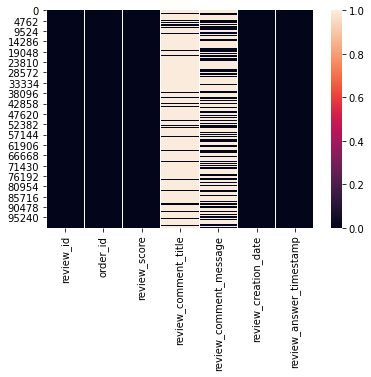

In [8]:
# Visualizando valores faltantes com heatmap
sns.heatmap(data=reviews.isnull());

Confirmamos que h√° uma grande quantidade de valores faltantes.

In [9]:
# Visualizando alguns coment√°rios
reviews['review_comment_message']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                    Recebi bem antes do prazo estipulado.
4        Parab√©ns lojas lannister adorei comprar pela I...
                               ...                        
99995                                                  NaN
99996    Excelente mochila, entrega super r√°pida. Super...
99997                                                  NaN
99998    Solicitei a compra de uma capa de retrovisor c...
99999    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 100000, dtype: object

In [10]:
# Visualizando alguns t√≠tulos dos coment√°rios
reviews['review_comment_title'].unique()

array([nan, 'recomendo', 'Super recomendo', ...,
       'N√£o foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

In [11]:
# N√∫mero de t√≠tulos n√£o √∫nicos
reviews['review_comment_title'].nunique()

4600

In [12]:
# Contagem dos scores
reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

Podemos ainda fazer um histograma para verificar a ocorr√™ncia dos scores.

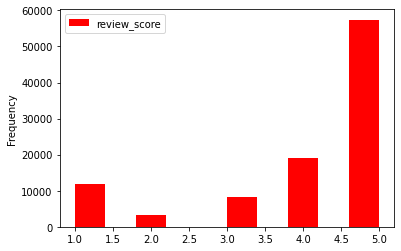

In [13]:
# # Plotando histograma
reviews.plot(kind='hist', color='r');

### Adicionando coluna para classifica√ß√£o

No dataframe reviews temos a coluna "review_score" que representa as notas (de 1 a 5) para os servi√ßos oferecidos. Neste caso, como queremos criar um classificador bin√°rio para os coment√°rios (positivos e negativos) devemos ent√£o gerar esta classifica√ß√£o baseado no score dado para cada coment√°rio. Assim, tomaremos o seguinte crit√©rio:

- scores 1, 2 e 3: coment√°rio negativo = 0;
- scores 4 e 5: coment√°rio positivo = 1.

Desta forma, adicionaremos a coluna "feedback" com a respectiva classifica√ß√£o para cada coment√°rio.

In [14]:
# Adicionando a coluna "feedback"
reviews['feedback'] = reviews['review_score'].apply(lambda x: 1 if x >= 4 else 0)

In [15]:
# Verificando o dataframe com a nova coluna
reviews

review_id  ... feedback
0      7bc2406110b926393aa56f80a40eba40  ...        1
1      80e641a11e56f04c1ad469d5645fdfde  ...        1
2      228ce5500dc1d8e020d8d1322874b6f0  ...        1
3      e64fb393e7b32834bb789ff8bb30750e  ...        1
4      f7c4243c7fe1938f181bec41a392bdeb  ...        1
...                                 ...  ...      ...
99995  f3897127253a9592a73be9bdfdf4ed7a  ...        1
99996  b3de70c89b1510c4cd3d0649fd302472  ...        1
99997  1adeb9d84d72fe4e337617733eb85149  ...        1
99998  be360f18f5df1e0541061c87021e6d93  ...        0
99999  efe49f1d6f951dd88b51e6ccd4cc548f  ...        0

[100000 rows x 8 columns]

Agora precisamos eliminar as colunas do dataframe que n√£o ser√£o utilizadas. Logo, deixaremos apenas as colunas "review_comment_message" e "feedback".

In [16]:
# Deletando colunas desnecess√°rias
reviews = reviews.drop(columns=['review_id', 'order_id', 'review_score', 
                                'review_comment_title', 'review_creation_date',	
                                'review_answer_timestamp'], axis=1)

# Visualizando o cabe√ßalho
reviews.head()

review_comment_message  feedback
0                                                NaN         1
1                                                NaN         1
2                                                NaN         1
3              Recebi bem antes do prazo estipulado.         1
4  Parab√©ns lojas lannister adorei comprar pela I...         1

In [17]:
# Deletando registros com valores faltantes
reviews.dropna(inplace=True)

In [18]:
# Visualizando o cabe√ßalho
reviews.head()

review_comment_message  feedback
3               Recebi bem antes do prazo estipulado.         1
4   Parab√©ns lojas lannister adorei comprar pela I...         1
9   aparelho eficiente. no site a marca do aparelh...         1
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n         1
15  Vendedor confi√°vel, produto ok e entrega antes...         1

In [19]:
# Visualizando o novo shape do dataframe
reviews.shape

(41753, 2)

Podemos confirmar que o novo dataframe n√£o tem valores faltantes pelo heatmap.

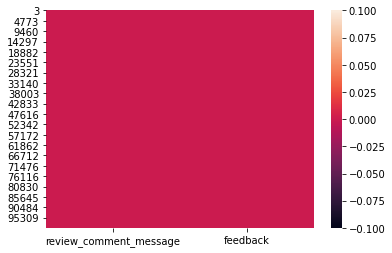

In [27]:
# Heatmap
sns.heatmap(data=reviews.isnull());

In [28]:
reviews.isnull().sum()

review_comment_message    0
feedback                  0
dtype: int64

Podemos plotar um histograma da coluna "feedback".

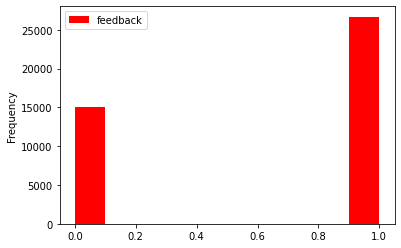

In [20]:
reviews.plot(kind='hist', color='r');

Podemos ainda adicionar mais uma estat√≠stica para entendermos melhor os nossos dados. Neste caso, iremos verificar qual √©, em m√©dia, o n√∫mero de caracteres de cada coment√°rio. Criaremos ent√£o, outro dataframe para este fim.

In [21]:
# Cria√ß√£o do novo dataframe
reviews_character_length = reviews.copy() 

# Criando a coluna com o n√∫mero de caracteres
reviews_character_length['length'] = reviews['review_comment_message'].apply(len)

In [22]:
# Visualizando o cabe√ßalho
reviews_character_length

review_comment_message  feedback  length
3                  Recebi bem antes do prazo estipulado.         1      37
4      Parab√©ns lojas lannister adorei comprar pela I...         1     100
9      aparelho eficiente. no site a marca do aparelh...         1     174
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n         1      45
15     Vendedor confi√°vel, produto ok e entrega antes...         1      56
...                                                  ...       ...     ...
99983  Entregou dentro do prazo. O produto chegou em ...         1      91
99990  O produto n√£o foi enviado com NF, n√£o existe v...         0     125
99996  Excelente mochila, entrega super r√°pida. Super...         1      67
99998  Solicitei a compra de uma capa de retrovisor c...         0     198
99999  meu produto chegou e ja tenho que devolver, po...         0      85

[41753 rows x 3 columns]

In [23]:
# Estat√≠sticas de reviews_character_length
reviews_character_length.describe()

feedback        length
count  41753.000000  41753.000000
mean       0.638996     70.038632
std        0.480297     54.778207
min        0.000000      1.000000
25%        0.000000     28.000000
50%        1.000000     54.000000
75%        1.000000     97.000000
max        1.000000    208.000000

In [24]:
# Checando alguns reviews
reviews_character_length.query('length == 1')

review_comment_message  feedback  length
299                        A         1       1
1603                       X         1       1
2398                       A         0       1
3845                       .         1       1
4373                       .         1       1
...                      ...       ...     ...
92797                      .         1       1
94124                                1       1
94943                      .         1       1
95538                      S         1       1
98334                      -         1       1

[103 rows x 3 columns]

In [25]:
# Verificando a quantidade de caracteres √∫nicos
reviews_character_length.query('length == 1')['review_comment_message'].value_counts()

.    51
      9
A     4
5     3
?     3
-     3
m     2
*     2
üëç     2
S     2
o     2
üòÄ     2
s     2
t     1
W     1
8     1
,     1
Y     1
x     1
X     1
0     1
O     1
I     1
K     1
9     1
4     1
üëé     1
B     1
L     1
Name: review_comment_message, dtype: int64

In [26]:
# Checando alguns reviews
reviews_character_length.query('length == 208.000000')['review_comment_message'].iloc[0]

'N√ÉO RECEBI O PRODUTO, O PRODUTO CONSTA COMO ENVIADO PARA O CORREIO DE RIBEIR√ÉO PRETO. O CORREIO N√ÉO RECEBEU O PRODUTO. ENVIE VARIAS MENSAGEM PARA A targaryen E N√ÉO OBTIVE. ESTA targaryen ESTA SUJANDO SEU NOME'

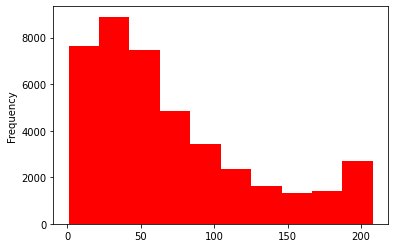

In [29]:
# Histograma para o tamanho dos reviews
reviews_character_length['length'].plot(kind='hist', color='r');

### Reviews positivos e negativos

Iremos agora gerar dataframes com reviews positivos e negativos e comparar ambos.

In [30]:
# Dataframe negativo
negative = reviews_character_length.query('feedback == 0')
negative.head()

review_comment_message  feedback  length
16  GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...         0      78
19                                            P√©ssimo         0       7
29                N√£o gostei ! Comprei gato por lebre         0      35
32  Sempre compro pela Internet e a entrega ocorre...         0     173
39                       Nada de chegar o meu pedido.         0      28

In [32]:
# Shape
negative.shape

(15073, 3)

In [33]:
# Visualizando estat√≠stica
negative.describe()

feedback        length
count   15073.0  15073.000000
mean        0.0     97.485570
std         0.0     60.328699
min         0.0      1.000000
25%         0.0     46.000000
50%         0.0     86.000000
75%         0.0    148.000000
max         0.0    208.000000

In [31]:
# Dataframe positivo
positive = reviews_character_length.query('feedback == 1')
positive.head()

review_comment_message  feedback  length
3               Recebi bem antes do prazo estipulado.         1      37
4   Parab√©ns lojas lannister adorei comprar pela I...         1     100
9   aparelho eficiente. no site a marca do aparelh...         1     174
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n         1      45
15  Vendedor confi√°vel, produto ok e entrega antes...         1      56

In [34]:
# Shape
positive.shape

(26680, 3)

In [35]:
# Visualizando estat√≠stica
positive.describe()

feedback        length
count   26680.0  26680.000000
mean        1.0     54.532346
std         0.0     44.426964
min         1.0      1.000000
25%         1.0     22.000000
50%         1.0     43.000000
75%         1.0     72.000000
max         1.0    207.000000

Vemos que os coment√°rios negativos √©, em m√©dia, maior do que os positivos e um motivo plaus√≠vel √© a possibilidade de as pessoas com queixas do servi√ßo explicarem mais detalhadamente sua insatisfa√ß√£o.